In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats, interpolate
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

In [2]:
# Tính giá trị tới hạn bằng scipy và hàm ppf (hàm ngược của hàm cdf) #
from scipy.stats import norm
def critical_value(alpha, tail=0):
    '''Tính giá trị tới hạn: tail=0:: 2phia; tail=-1:left; tail=1:right'''
    if tail == -1: return norm.ppf(alpha)
    elif tail == 1: return norm.ppf(1-alpha)
    else: return (norm.ppf(alpha/2), norm.ppf(1-alpha/2))

alpha = 0.05
# tu bang A.2 chon t_* = 1.96
# dung ham cdf de tinh gia tri p chinh xac neu t_*=1.96
print(f"Giá trị tới hạn 2 phía: {critical_value(alpha)}")
print(f"Giá trị tới hạn 1 phía (left): {critical_value(alpha, tail=-1)}")
print(f"Giá trị tới hạn 1 phía (right): {critical_value(alpha, tail=1)}")
# Khi thi ta chấp nhận t_* = 1.96
# Trong khi thực hành thì ta không chấp nhận t_*=1.96 mà giá trị thực là t_* = 1.959963984540054

Giá trị tới hạn 2 phía: (-1.9599639845400545, 1.959963984540054)
Giá trị tới hạn 1 phía (left): -1.6448536269514729
Giá trị tới hạn 1 phía (right): 1.6448536269514722


In [3]:
gia_nha_dat_us = pd.read_csv("gia_nha_dat_us.csv")
gia_nha_dat_us.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = gia_nha_dat_us[['MSSubClass', 'MSZoning', 'LotArea', 'SalePrice']]
df.head()

,MSSubClass,MSZoning,LotArea,SalePrice
0,60,RL,8450,208500
1,20,RL,9600,181500
2,60,RL,11250,223500
3,70,RL,9550,140000
4,60,RL,14260,250000


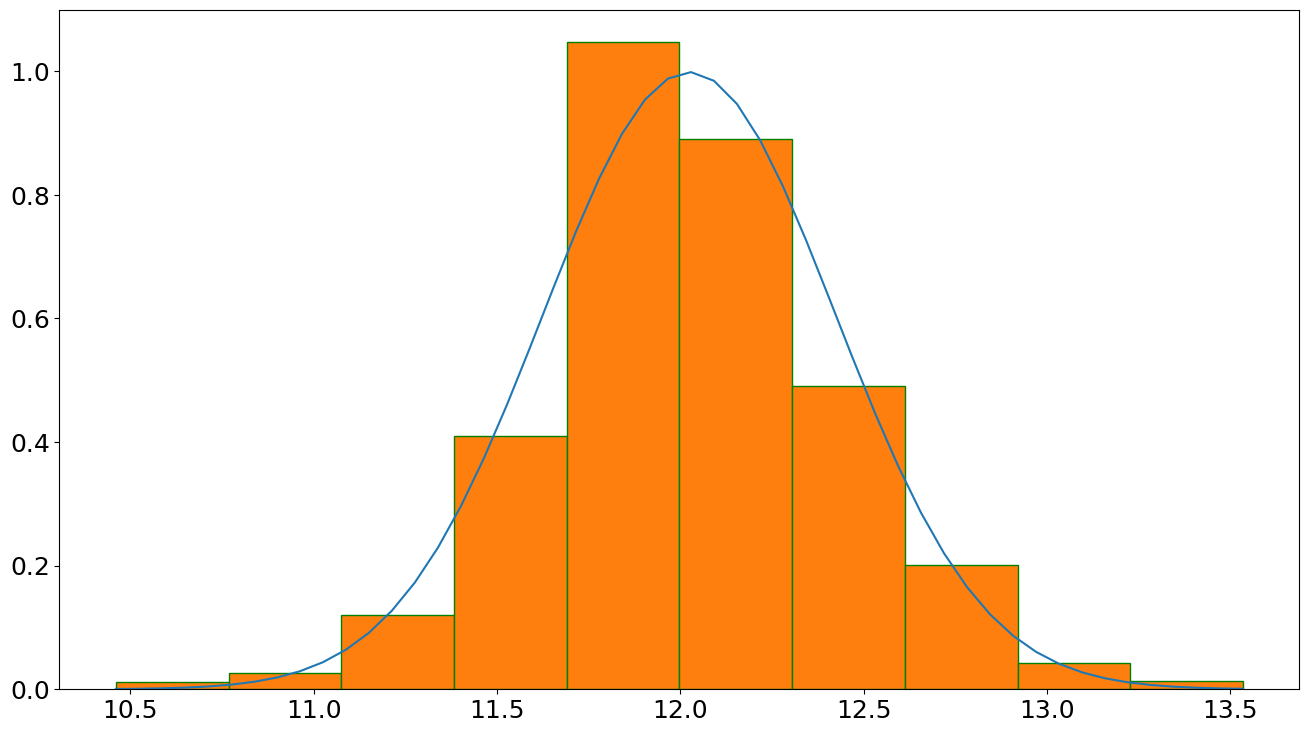

In [5]:
# Engineering feature: log transform #
data = df['SalePrice']
# Sử dụng ln(1+r) ~ r để tránh rate of change #
data = np.log1p(data)

# Kiem tra data co chuan hay khong?
mean = np.mean(data)
# ddof=1 :: hiệu chỉnh
std = np.std(data, ddof=1)
domain = np.linspace(np.min(data), np.max(data))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(data, edgecolor='green', density=True)
plt.show()

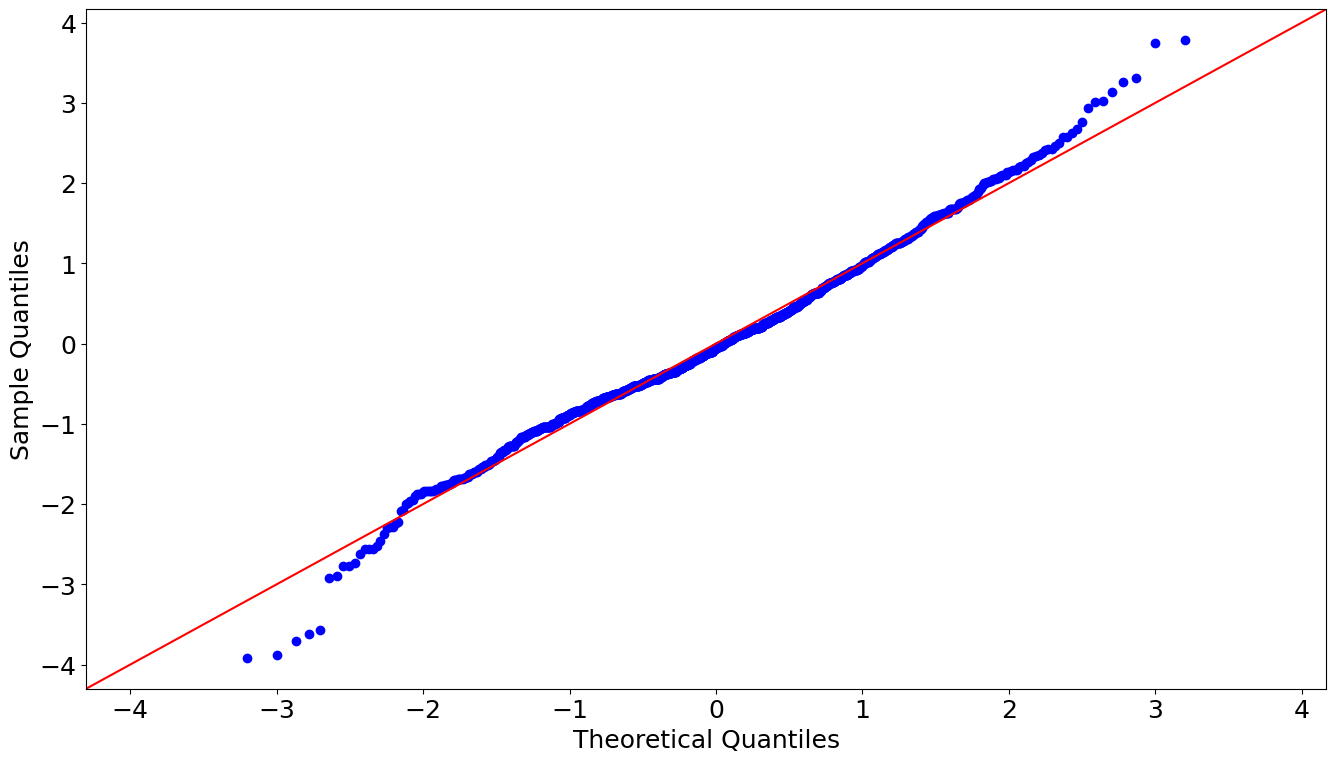

In [6]:
def standadize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/std

sm.qqplot(standadize(data), line ='45')
plt.show()

In [7]:
my_mean = 150000
my_log_mean = np.log1p(my_mean)
print(my_log_mean)

11.918397239722838


In [8]:
def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
           p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
           p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

In [9]:
# Lay ngau nhien 100 diem du lieu #
sample_1 = data.sample(n=100)

In [10]:
#Kiem dinh mean cua sample so voi ky vong mu_0=11.918397239722838
# kiem dinh 2 phia: H0: mu = mu_0, H1: mu != mu_0
from scipy.stats import ttest_1samp
p = {}
p['mean1'] = np.mean(sample_1)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample_1, my_log_mean)
results(p)

,mean1,mean2,score,p_value,KetLuan
,12.00131,11.918397,2.007265,0.047447,Chấp nhận H1 với mức ý nghĩa 0.05


In [11]:
# alternative{‘two-sided’, ‘less’, ‘greater’}
# kiem dinh ben trai: H0 mu = mu_0, H1: mu < mu_0
p = {}
p['mean1'] = np.mean(sample_1)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample_1, my_log_mean, alternative='less')
results(p)

,mean1,mean2,score,p_value,KetLuan
,12.00131,11.918397,2.007265,0.976276,Chấp nhận H0 với mức ý nghĩa 0.05


In [12]:
# alternative{‘two-sided’, ‘less’, ‘greater’}
# kiem dinh ben phai: H0 mu = mu_0, H1: mu > mu_0
p = {}
p['mean1'] = np.mean(sample_1)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample_1, my_log_mean, alternative='greater')
results(p)

,mean1,mean2,score,p_value,KetLuan
,12.00131,11.918397,2.007265,0.023724,Chấp nhận H1 với mức ý nghĩa 0.05


**Chọn giá trị n lớn hơn 100 khác nhau**

In [13]:
so_luong = np.linspace(250, 1400, 7)
sample_s = []
for n in (so_luong):
    n = int(n)
    sample_s.append(data.sample(n=n))

In [14]:
print(sample_s[1])

1342    12.339296
847     11.801864
1221    11.805603
1244    12.345839
1154    12.215037
          ...    
1350    12.206078
1050    12.080997
305     12.631017
899     11.813037
11      12.751303
Name: SalePrice, Length: 441, dtype: float64


**Kiểm định 2 phía**: khi mẫu càng lớn thì p_value càng dần tiến đến 1. Kết luận dần tiến về phía chấp nhận H0

In [15]:
for sample in sample_s:
    p = {}
    p['mean1'] = np.mean(sample)
    p['mean2'] = my_log_mean
    p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean, alternative='less')
    print(f' kết quả khi n = {len(sample)}')
    print(results(p))
    

 kết quả khi n = 250
      mean1      mean2     score   p_value                            KetLuan
  12.027274  11.918397  4.567541  0.999996  Chấp nhận H0 với mức ý nghĩa 0.05
 kết quả khi n = 441
      mean1      mean2     score  p_value                            KetLuan
  12.015058  11.918397  5.075476      1.0  Chấp nhận H0 với mức ý nghĩa 0.05
 kết quả khi n = 633
      mean1      mean2     score  p_value                            KetLuan
  12.012287  11.918397  6.171744      1.0  Chấp nhận H0 với mức ý nghĩa 0.05
 kết quả khi n = 825
      mean1      mean2     score  p_value                            KetLuan
  12.027422  11.918397  7.526836      1.0  Chấp nhận H0 với mức ý nghĩa 0.05
 kết quả khi n = 1016
      mean1      mean2     score  p_value                            KetLuan
  12.021113  11.918397  8.099907      1.0  Chấp nhận H0 với mức ý nghĩa 0.05
 kết quả khi n = 1208
      mean1      mean2     score  p_value                            KetLuan
  12.018868  11.918397 

**Kiểm định một phía trái**: khi mẫu càng lớn thì p_value càng dần tiến đến 1. Kết luận dần tiến về phía chấp nhận H0

In [16]:
for sample in sample_s:
    p = {}
    p['mean1'] = np.mean(sample)
    p['mean2'] = my_log_mean
    p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean)
    print(f' kết quả khi n = {len(sample)}')
    print(results(p))


 kết quả khi n = 250
      mean1      mean2     score   p_value                            KetLuan
  12.027274  11.918397  4.567541  0.000008  Chấp nhận H1 với mức ý nghĩa 0.05
 kết quả khi n = 441
      mean1      mean2     score       p_value  \
  12.015058  11.918397  5.075476  5.714428e-07   

                            KetLuan  
  Chấp nhận H1 với mức ý nghĩa 0.05  
 kết quả khi n = 633
      mean1      mean2     score       p_value  \
  12.012287  11.918397  6.171744  1.207262e-09   

                            KetLuan  
  Chấp nhận H1 với mức ý nghĩa 0.05  
 kết quả khi n = 825
      mean1      mean2     score       p_value  \
  12.027422  11.918397  7.526836  1.363544e-13   

                            KetLuan  
  Chấp nhận H1 với mức ý nghĩa 0.05  
 kết quả khi n = 1016
      mean1      mean2     score       p_value  \
  12.021113  11.918397  8.099907  1.568182e-15   

                            KetLuan  
  Chấp nhận H1 với mức ý nghĩa 0.05  
 kết quả khi n = 1208
      me

**Kiểm định một phía phải**: khi mẫu càng lớn thì p_value càng dần tiến về 0. Kết luận dần tiến về phía chấp nhận H1

In [18]:
for sample in sample_s:
    p = {}
    p['mean1'] = np.mean(sample)
    p['mean2'] = my_log_mean
    p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean, alternative='greater')
    print(f' kết quả khi n = {len(sample)}')
    print(results(p))
   

 kết quả khi n = 250
      mean1      mean2     score   p_value                            KetLuan
  12.027274  11.918397  4.567541  0.000004  Chấp nhận H1 với mức ý nghĩa 0.05
 kết quả khi n = 441
      mean1      mean2     score       p_value  \
  12.015058  11.918397  5.075476  2.857214e-07   

                            KetLuan  
  Chấp nhận H1 với mức ý nghĩa 0.05  
 kết quả khi n = 633
      mean1      mean2     score       p_value  \
  12.012287  11.918397  6.171744  6.036309e-10   

                            KetLuan  
  Chấp nhận H1 với mức ý nghĩa 0.05  
 kết quả khi n = 825
      mean1      mean2     score       p_value  \
  12.027422  11.918397  7.526836  6.817718e-14   

                            KetLuan  
  Chấp nhận H1 với mức ý nghĩa 0.05  
 kết quả khi n = 1016
      mean1      mean2     score       p_value  \
  12.021113  11.918397  8.099907  7.840909e-16   

                            KetLuan  
  Chấp nhận H1 với mức ý nghĩa 0.05  
 kết quả khi n = 1208
      me

Nhận thấy để tìm ra được giá trị kỳ vọng **gần với giá trị trung bình của mẫu nhất** (*với mức ý nghĩa 0.05*). Thì giá trị kì vọng đó nên **bằng đúng với trung bình mẫu**.

In [19]:
my_log_mean_2 = 12.024474
# suy ra my_mean
my_mean_2 =  np.expm1(my_log_mean_2)
print(my_mean_2)

166786.19543785087


In [20]:
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean_2
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean_2)
results(p)

,mean1,mean2,score,p_value,KetLuan
,12.018712,12.024474,-0.539809,0.589414,Chấp nhận H0 với mức ý nghĩa 0.05
